# WORD2VEC

In [12]:
from os.path import join as joinp
import pandas as pd
import numpy as np
import codecs
import itertools as it
import spacy
import boto3
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

nlp = spacy.load('en')

spacy.lang.en.STOP_WORDS.add("-PRON-")
spacy.lang.en.STOP_WORDS.add("'")

In [9]:
pilot_path='/Users/eran/Galvanize_more_repositories/Support_group_MD/pilot'  # thr directory with the final files of the project
word_path='/Users/eran/Galvanize_more_repositories/Support_group_MD/word2vec_files'  # thr directory with the final files of the project


importing word2vec

In [15]:
from gensim.models import Word2Vec

trigram_sentences = LineSentence(joinp(pilot_path,'trigram_sentences_all.txt'))
# old: trigram_sentences = LineSentence(trigram_sentences_filepath)

#word2vec_filepath = joinp(word_path, 'word2vec_model_all')
joinp(word_path, 'word2vec_model_all')

'/Users/eran/Galvanize_more_repositories/Support_group_MD/word2vec_files/word2vec_model_all'

just to remember how trigram.. looks like

In [11]:
with codecs.open(joinp(pilot_path,'trigram_sentences_all.txt'), encoding='utf_8') as f:
    for sent in it.islice(f, 0, 4):
        print(sent)

hii coconut_nectar and coconut_butter ok to have when treat candida

thank for -PRON- help

not sure about coconut_butter

coconut_nectar would be a definite no because of the high natural sugar_content



In [21]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to train the word2vec model yourself.
if 1 == 1:

    # initiate the model and perform the first epoch of training
    candi2vec = Word2Vec(trigram_sentences, size=100, window=5,
                        min_count=20, sg=1, workers=4)
    
    #old: candi2vec.save(word2vec_filepath)
    candi2vec.save(joinp(word_path, 'word2vec_model_all'))
    # perform another 11 epochs of training
    for i in range(1,12):

        candi2vec.train(trigram_sentences,total_examples=candi2vec.corpus_count, epochs=candi2vec.iter,)
        candi2vec.save(joinp(word_path, 'word2vec_model_all'))
        
# load the finished model from disk
candi2vec = Word2Vec.load(joinp(word_path, 'word2vec_model_all'))
candi2vec.init_sims()

print(u'{} training epochs so far.'.format(candi2vec.train_count))

/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


12 training epochs so far.
CPU times: user 26min 13s, sys: 5.76 s, total: 26min 18s
Wall time: 7min 28s


In [23]:
print(u'{:,} terms in the candi2vec vocabulary.'.format(len(candi2vec.wv.vocab))) 

9,032 terms in the candi2vec vocabulary.


Let's take a peek at the word vectors our model has learned. We'll create a pandas DataFrame with the terms as the row labels, and the 100 dimensions of the word vector model as the columns.

In [27]:
from six import iteritems

In [36]:
# build a list of the terms, integer indices,
# and term counts from the candi2vec model vocabulary
ordered_vocab = [(term, voc.index, voc.count) for term, voc in candi2vec.wv.vocab.items()]

# sort by the term counts, so the most common terms appear first
ordered_vocab = sorted(ordered_vocab, key=lambda k: k[2])

# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)

# create a DataFrame with the food2vec vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(candi2vec.wv.syn0[term_indices, :], index=ordered_terms)

/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  del sys.path[0]


In [40]:
print("matrix shape:",word_vectors.shape)
word_vectors.head()

matrix shape: (9032, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
nori,0.681589,0.086686,0.237987,0.628737,-0.286396,0.799993,-0.451227,0.068365,-0.874252,-0.267618,...,-0.492964,0.164013,-0.310790,0.293377,-0.286912,-0.445305,-0.250312,1.029296,-0.805014,-0.175689
read_elsewhere,0.499326,0.662274,-0.624381,-0.966111,-0.090979,0.385780,0.060170,-0.100796,0.475549,-0.234469,...,-0.340177,0.203632,-0.516947,-0.121309,-0.139134,0.094469,0.448722,-0.230956,0.101692,0.763892
rectal_itch,-0.146520,1.186770,-0.712997,-0.325527,0.082472,0.629991,-0.045502,-0.233636,-0.738069,0.720573,...,-0.402532,0.216625,0.037251,-0.271751,0.371983,-0.211234,-0.469016,0.126783,-1.030901,-0.219837
rope,-0.194221,0.404943,0.456506,1.566476,0.608982,-0.165681,0.101460,0.243865,-0.371924,-0.137304,...,-0.447617,-0.002306,-0.222654,-0.527519,0.343860,-0.207709,-0.494058,-1.052127,-0.821473,-0.119269
an_intestinal_overgrowth,-0.238418,0.164938,-0.127787,-0.495216,-0.585488,0.882389,-0.110022,-0.183745,0.140242,0.219921,...,-0.082567,0.454462,-0.015244,-0.180688,1.209564,0.139542,-0.616158,-0.308763,-0.305312,-0.171400


### most similar topics

In [151]:
def get_related_terms(token, topn=10):
    """
    look up the topn most similar terms to token
    and print them as a formatted list
    """
    dic={}
    for word, similarity in candi2vec.most_similar(positive=[token], topn=topn):

        print(u'{:20} {}'.format(word, round(similarity, 3)))
        dic[word]=similarity
    dff=pd.DataFrame.from_dict(dic,orient='index')
    dff.columns=[': '.join(['similarity with',str(token)])]    
    return(dff)

In [193]:
i=get_related_terms(u'antibiotics',15)

abx                  0.51
round                0.505
ppi_’s               0.504
flagyl               0.498
birth_control        0.486
antibiotic           0.474
nizoral              0.469
tail                 0.462
tylenol              0.461
diflucan             0.461
sinus_infection      0.455
dos                  0.446
anti_biotic          0.445
pill                 0.441
inner_ear            0.438


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 4)

Populating the interactive namespace from numpy and matplotlib


/Users/eran/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'ylim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
i['word']=i.index

[(0.4, 0.55)]

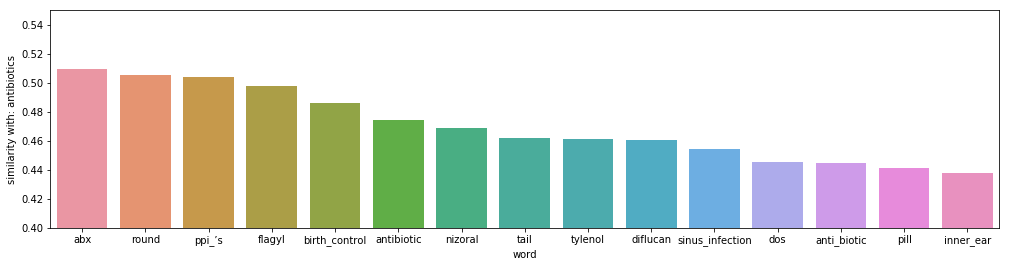

In [216]:
i.columns[0] ## the similarity column
g=sns.barplot(x='word',y=i.columns[0],data=i)
g.set(ylim=(0.4, 0.55)) ## look at the data 1st to see what is the range

In [226]:
fung=get_related_terms(u'antifungal',12)
# fung.describe()['min']

anti_fungal          0.852
natural_antifungal   0.739
oregano_oil          0.685
caprylic_acid        0.654
nystatin             0.648
probiotic            0.645
gse                  0.638
sf722                0.633
grapefruit_seed_extract 0.592
diflucan             0.592
coconut_oil          0.577
natural_anti_fungal  0.575


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[(0.5, 0.9)]

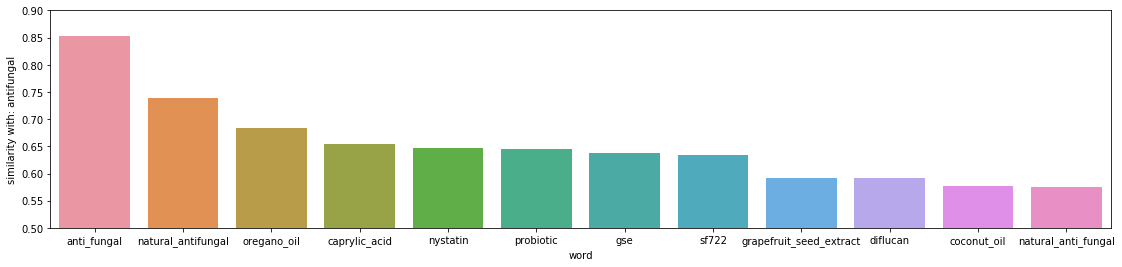

In [228]:
fung['word']=fung.index
fung.columns[0] ## the similarity column
f=sns.barplot(x='word',y=fung.columns[0],data=fung)
f.set(ylim=(0.5, 0.9)) ## look at the data 1st to see what is the range

In [244]:
get_related_terms(u'interstitial_cystitis')

dry_cough            0.535
gout                 0.525
ic                   0.516
chest_infection      0.516
bladder              0.514
crohn_’s_disease     0.508
chronic_fatigue_syndrome 0.506
ulcerative_colitis   0.498
asthma               0.498
fibromyalgia         0.491


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


,similarity with: interstitial_cystitis
dry_cough,0.535267
gout,0.524657
ic,0.516067
chest_infection,0.515547
bladder,0.513995
crohn_’s_disease,0.508149
chronic_fatigue_syndrome,0.505920
ulcerative_colitis,0.498289
asthma,0.498130
fibromyalgia,0.490910


In [43]:
get_related_terms(u'pain')

ache                 0.762
discomfort           0.753
cramp                0.711
muscle_pain          0.703
bladder              0.672
neck                 0.669
chest                0.669
nausea               0.668
irritation           0.664
joint_pain           0.664


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [240]:
get_related_terms(u'cipro')

levaquin             0.725
antibiotic           0.679
diflucan             0.648
flagyl               0.626
anti_biotic          0.598
amoxicillin          0.563
prednisone           0.555
nexium               0.551
ppi                  0.525
steroid              0.522


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


,similarity with: cipro
levaquin,0.725394
antibiotic,0.679248
diflucan,0.647980
flagyl,0.625898
anti_biotic,0.597832
amoxicillin,0.563250
prednisone,0.555032
nexium,0.551271
ppi,0.524827
steroid,0.522301


### word algebra

### (+)

In [52]:
def word_algebra(add=[], subtract=[], topn=3):
    """
    combine the vectors associated with the words provided
    in add= and subtract=, look up the topn most similar
    terms to the combined vector, and print the result(s)
    """
    answers = candi2vec.most_similar(positive=add, negative=subtract, topn=topn)
    
    for term, similarity in answers:
        print(term)

candida symptoms:
    
    candida + symptom = ?

In [70]:
word_algebra(add=[u'symptom',u'candida'],topn=10)

candida_overgrowth
oral_thrush
yeast_infection
brain_fog
infestation
thrush
die_off_symptom
fatigue
candidiasis
infection


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [71]:
word_algebra(add=[u'symptom',u'antifungal'],topn=10)

anti_fungal
die_off_symptom
sympton
diflucan
natural_antifungal
die_off
side_effect
symtom
oregano_oil
brain_fog


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [230]:
word_algebra(add=[u'symptom',u'stomach'],topn=10)

bloating
nausea
stomach_pain
brain_fog
headache
pain
dizziness
fatigue
acid_reflux
bloat


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [231]:
word_algebra(add=[u'symptom',u'gut'],topn=10)

digestive_problem
brain_fog
bloating
digestive_issue
inflammation
gas_bloating
leaky_gut
intestine
digestive_tract
flora


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [241]:
word_algebra(add=['symptom','cipro'],topn=12)

levaquin
brain_fog
thrush
yeast_infection
diflucan
sinus_infection
oral_thrush
rash
dizziness
acne
migraine
fatigue


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [103]:
word_algebra(add=[u'treatment',u'symptom'])

infestation
ailment
die_off_symptom


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


### (-)

skin is to rash : head is to? 
    
rash - skin + head = ?

(didn't work very well.)

In [66]:
word_algebra(add=[u'rash',u'head'],subtract=[u'skin'])

arm
elbow
neck


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [99]:
word_algebra(add=[u'full',u'stomach'],subtract=[u'skin'])

pop
burn_sensation
dull


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


## Word Vector Visualization with t-SNE¶

[t-Distributed Stochastic Neighbor Embedding](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf), or *t-SNE* for short, is a dimensionality reduction technique to assist with visualizing high-dimensional datasets. It attempts to map high-dimensional data onto a low two- or three-dimensional representation such that the relative distances between points are preserved as closely as possible in both high-dimensional and low-dimensional space.

scikit-learn provides a convenient implementation of the t-SNE algorithm with its [TSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

In [72]:
from sklearn.manifold import TSNE

In [88]:
import pickle
spacy.lang.en.STOP_WORDS.add("-PRON-")
spacy.lang.en.STOP_WORDS.add("'")
spacy.lang.en.STOP_WORDS.add("’")
spacy.lang.en.STOP_WORDS.add("-")

tsne_input = word_vectors.drop(spacy.lang.en.STOP_WORDS, errors=u'ignore')
tsne_input = tsne_input.head(1000)

In [89]:
tsne_input.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
nori,0.681589,0.086686,0.237987,0.628737,-0.286396,0.799993,-0.451227,0.068365,-0.874252,-0.267618,...,-0.492964,0.164013,-0.310790,0.293377,-0.286912,-0.445305,-0.250312,1.029296,-0.805014,-0.175689
read_elsewhere,0.499326,0.662274,-0.624381,-0.966111,-0.090979,0.385780,0.060170,-0.100796,0.475549,-0.234469,...,-0.340177,0.203632,-0.516947,-0.121309,-0.139134,0.094469,0.448722,-0.230956,0.101692,0.763892
rectal_itch,-0.146520,1.186770,-0.712997,-0.325527,0.082472,0.629991,-0.045502,-0.233636,-0.738069,0.720573,...,-0.402532,0.216625,0.037251,-0.271751,0.371983,-0.211234,-0.469016,0.126783,-1.030901,-0.219837
rope,-0.194221,0.404943,0.456506,1.566476,0.608982,-0.165681,0.101460,0.243865,-0.371924,-0.137304,...,-0.447617,-0.002306,-0.222654,-0.527519,0.343860,-0.207709,-0.494058,-1.052127,-0.821473,-0.119269
an_intestinal_overgrowth,-0.238418,0.164938,-0.127787,-0.495216,-0.585488,0.882389,-0.110022,-0.183745,0.140242,0.219921,...,-0.082567,0.454462,-0.015244,-0.180688,1.209564,0.139542,-0.616158,-0.308763,-0.305312,-0.171400


In [90]:
tsne_filepath = joinp(word_path,u'tsne_model')

tsne_vectors_filepath = joinp(word_path,u'tsne_vectors.npy')

In [91]:
%%time

if 1 == 1:
    
    tsne = TSNE()
    tsne_vectors = tsne.fit_transform(tsne_input.values)
    
    #with open(joinp(pilot_path,'ldavis_25'), 'wb') as f:
       # pickle.dump(LDAvis_prepared, f)
        
    with open(tsne_filepath, 'wb') as f:
        pickle.dump(tsne, f)

    pd.np.save(tsne_vectors_filepath, tsne_vectors)
    
with codecs.open(tsne_filepath,'rb') as f:
    tsne = pickle.load(f)
    
tsne_vectors = pd.np.load(tsne_vectors_filepath)

tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=[u'x_coord', u'y_coord'])

CPU times: user 20.4 s, sys: 2.24 s, total: 22.6 s
Wall time: 22.8 s


In [92]:
# now we have 2 dimentional space:
tsne_vectors.head()

,x_coord,y_coord
nori,5.924352,4.221960
read_elsewhere,2.629639,1.754719
rectal_itch,1.362227,-4.988245
rope,3.371720,-2.830123
an_intestinal_overgrowth,-2.771406,-3.149047


In [96]:
tsne_vectors.index[0:4]

Index(['nori', 'read_elsewhere', 'rectal_itch', 'rope'], dtype='object')

In [97]:
tsne_vectors[u'word'] = tsne_vectors.index

### Plotting with Bokeh

In [87]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [98]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 900,
                   plot_height = 600,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

#### relevant and prevalent words by "word2vec association" and LDA rank 

this is to later on filter sentences for sentiment analysis

In [245]:
fung=get_related_terms(u'antifungal',12)
# fung.describe()['min']

anti_fungal          0.852
natural_antifungal   0.739
oregano_oil          0.685
caprylic_acid        0.654
nystatin             0.648
probiotic            0.645
gse                  0.638
sf722                0.633
grapefruit_seed_extract 0.592
diflucan             0.592
coconut_oil          0.577
natural_anti_fungal  0.575


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


choose specific terms and not general (like Nystatin and not natural_antifungal), and do related terms again:

by using 'sents_LDA.py' we see that nystatin is in several topics, but it is high up (in the 12th place) only in topic 3 - 'dietary restriction /natural treatment' (named by me)

In [247]:
nys=get_related_terms(u'nystatin',13)

diflucan             0.82
fluconazole          0.759
itraconazole         0.665
lamisil              0.657
ketoconazole         0.654
terbinafine          0.651
rx                   0.65
clotrimazole         0.649
antifungal           0.648
nystatin_powder      0.629
sf-722               0.602
rx_antifungal        0.597
oregano_oil          0.596


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


let's continue with the "association game" let's choose fluconazole to see where it is and how prevalent:

highest rank is in topic 7 - 'experience / feeling / symptom' but in the 2319, so not as prevalent    

let's try - "sf722": rank 817 in topic 0 "daily do's and dont's"


In [248]:
from collections import Counter     


In [ ]:
Counter().most_common(5)

#### The next cells are tied to sent_LDA.py in the algorithm section: "find relevant sentences/words to treatment" where we need to use word2Vec

In [251]:
nys=get_related_terms(u'treatment',50) 
# general: treat,cure 
# specific: antifungal 

therapy              0.562
diet                 0.539
journey              0.536
recovery             0.532
infestation          0.525
program              0.506
protocol             0.504
healing              0.474
stage                0.467
healing_process      0.464
treat                0.462
cure                 0.452
experimental         0.444
elimination_diet     0.441
diagnosis            0.436
phase                0.436
period               0.433
career               0.432
cleanse              0.43
regime               0.429
systemic             0.427
regimen              0.427
progress             0.421
approach             0.42
informed             0.416
outcome              0.408
phase_2              0.406
fight_against        0.405
azole                0.404
jeopardize           0.404
http://www.thecandidadiet.com/forum/yaf_postst1922_index-of-posts.aspx 0.404
planning             0.403
medical              0.403
during               0.402
shorten              0.402
coloniz

/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
